 ##   Descriptive and Inferential statistics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [34]:
plt.rcParams['figure.figsize'] =(15,7)

### Descriptive statistics

In [6]:
data = pd.read_csv("shampoo.csv")
data

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


### summary

In [7]:
data.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


### Histogram

Text(0, 0.5, 'Frequency')

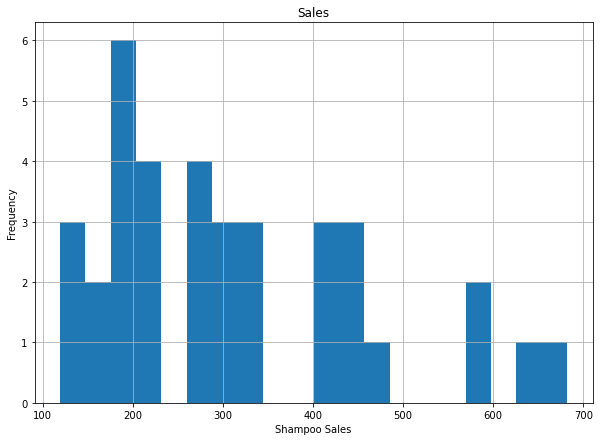

In [12]:
data.hist(bins =20)
plt.xlabel("Shampoo Sales")
plt.ylabel("Frequency")

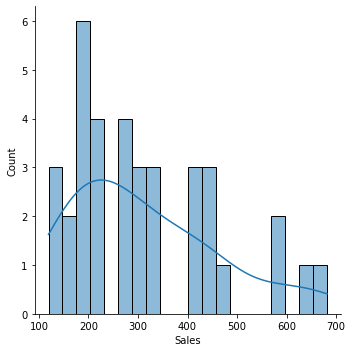

In [39]:
sns.displot(data.Sales,bins=20,kde= True)

### scatterplot

<AxesSubplot:xlabel='Month', ylabel='Sales'>

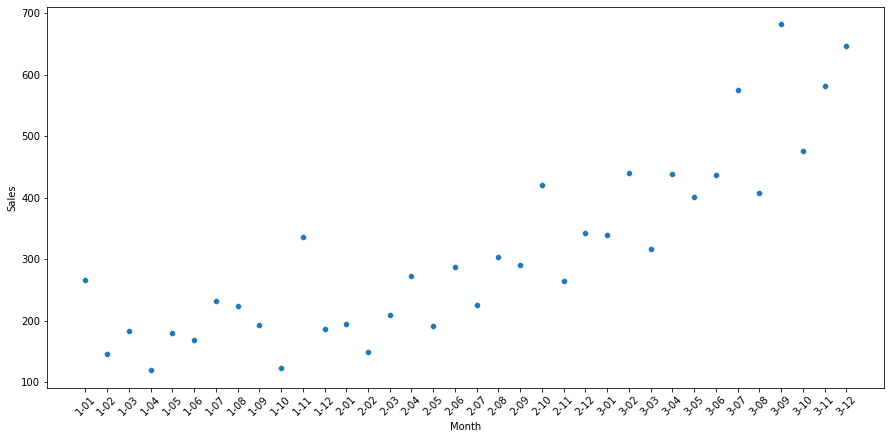

In [40]:
plt.xticks(rotation =45)
sns.scatterplot(x = data.Month, y = data.Sales)


## Inferential Statistics

In [41]:
co2_data = pd.read_csv("co2_dataset.csv")
co2_data

,year,data_mean_global,data_mean_nh,data_mean_sh
0,0,277.454000,277.454000,277.454000
1,1,277.137000,277.137000,277.137000
2,2,277.160000,277.160000,277.160000
3,3,277.158000,277.158000,277.158000
4,4,277.157000,277.157000,277.157000
...,...,...,...,...
2010,2010,388.717029,390.784658,386.649401
2011,2011,390.944015,393.041154,388.846876
2012,2012,393.015993,395.036206,390.995779
2013,2013,395.724979,397.714917,393.735042


In [42]:
co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              2015 non-null   int64  
 1   data_mean_global  2015 non-null   float64
 2   data_mean_nh      2015 non-null   float64
 3   data_mean_sh      2015 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 63.1 KB


In [43]:
co2_data_1950_onwd = co2_data[1950:]
co2_data_1950_onwd

,year,data_mean_global,data_mean_nh,data_mean_sh
1950,1950,312.820971,313.149453,312.492490
1951,1951,313.013971,313.362546,312.665395
1952,1952,313.341970,313.698088,312.985852
1953,1953,313.729969,314.094393,313.365546
1954,1954,314.094969,314.469432,313.720506
...,...,...,...,...
2010,2010,388.717029,390.784658,386.649401
2011,2011,390.944015,393.041154,388.846876
2012,2012,393.015993,395.036206,390.995779
2013,2013,395.724979,397.714917,393.735042


<AxesSubplot:xlabel='year', ylabel='data_mean_global'>

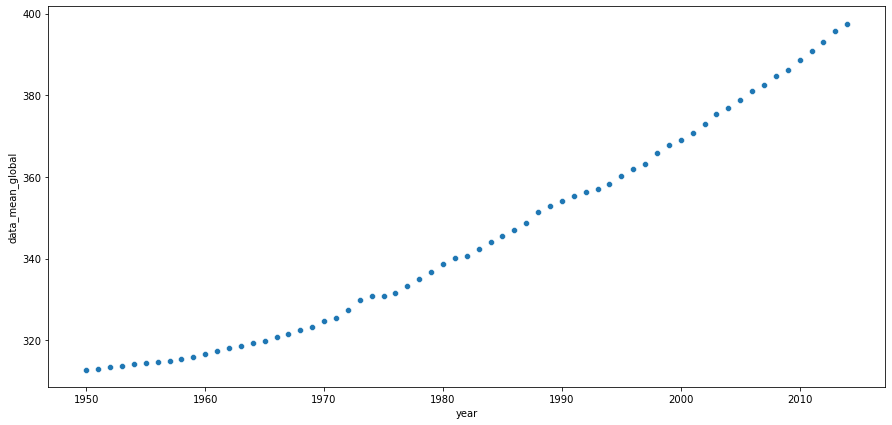

In [46]:
sns.scatterplot(x = co2_data_1950_onwd.year, y = co2_data_1950_onwd.data_mean_global)

In [48]:
co2_data_1950_onwd.year.shape
#shape

(65,)

In [60]:
#now fit the LR model to it
reg  =LinearRegression()
reg.fit(co2_data_1950_onwd.year.values.reshape(-1,1), co2_data_1950_onwd.data_mean_global.values.reshape(-1,1))
# shape(n,1)

LinearRegression()

In [62]:
reg.coef_
#slope

array([[1.35887119]])

In [63]:
reg.intercept_

array([-2348.03383])

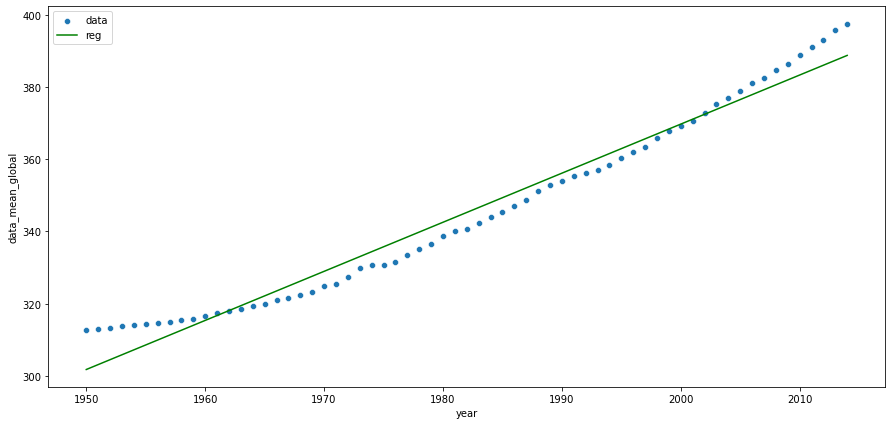

In [75]:
pred = reg.predict(co2_data_1950_onwd.year.values.reshape(-1,1))
#plot the model
sns.scatterplot(x= co2_data_1950_onwd.year, y = co2_data_1950_onwd.data_mean_global,label= 'data')
plt.plot(co2_data_1950_onwd.year, pred,label = 'reg',c='green')
plt.legend()

In [82]:
# now build the model using sm
x = sm.add_constant(co2_data_1950_onwd.year)
model= sm.OLS(co2_data_1950_onwd.data_mean_global,x).fit()
print(model.summary())

C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:       data_mean_global   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2073.
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           6.40e-50
Time:                        12:38:15   Log-Likelihood:                -189.19
No. Observations:                  65   AIC:                             382.4
Df Residuals:                      63   BIC:                             386.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2348.0338     59.161    -39.689      0.0

##### this shows model is good fit for the data but lets further explore the model using QQ-plot

In [83]:
res = model.resid
res

1950    11.055975
1951     9.890103
1952     8.859231
1953     7.888360
1954     6.894488
          ...    
2010     5.419762
2011     6.287876
2012     7.000983
2013     8.351098
2014     8.814224
Length: 65, dtype: float64

C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


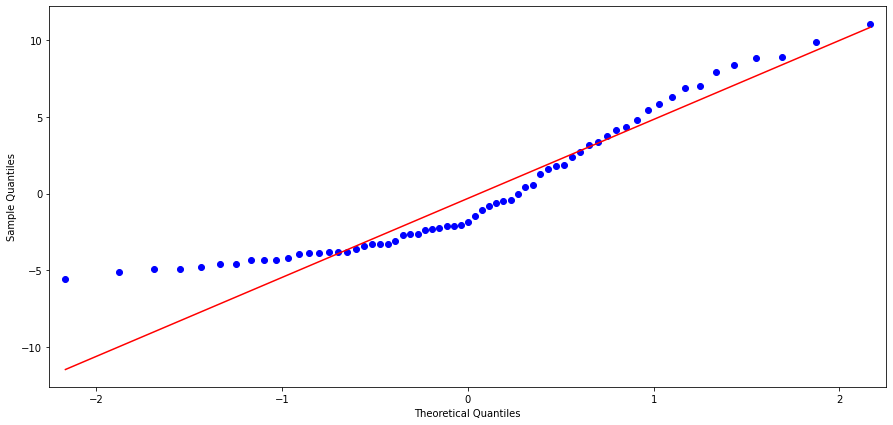

In [91]:
#plot QQ-plot
qq_plot = sm.qqplot(res,line="q")
plt.show()

#### this shows residuals does not have normal dist

<AxesSubplot:ylabel='Count'>

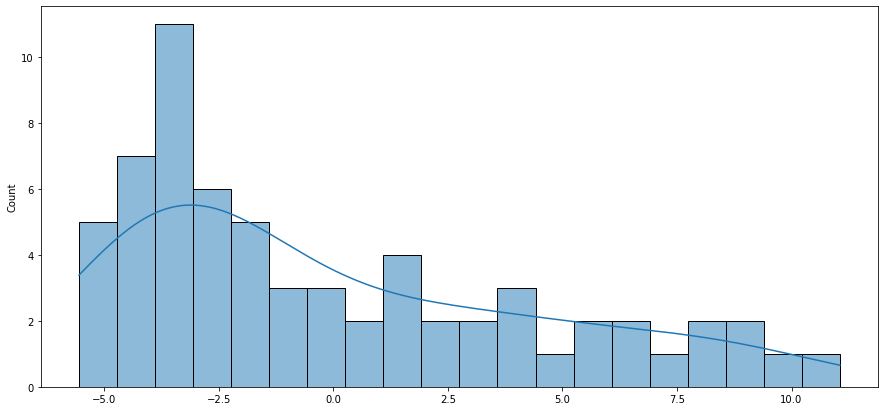

In [98]:
#hist of residuals
sns.histplot(res,kde=True,bins=20)

## concluding that this is not the best model

# Random walk

In [99]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

### Simulating Random Walk

[ 0.         -1.01906479 -2.14536612 -0.94839069 -0.68964995 -0.80188385
 -0.01812406 -1.63491137 -2.12998697 -2.45061889]


Text(0.5, 1.0, 'Simulated Random Data')

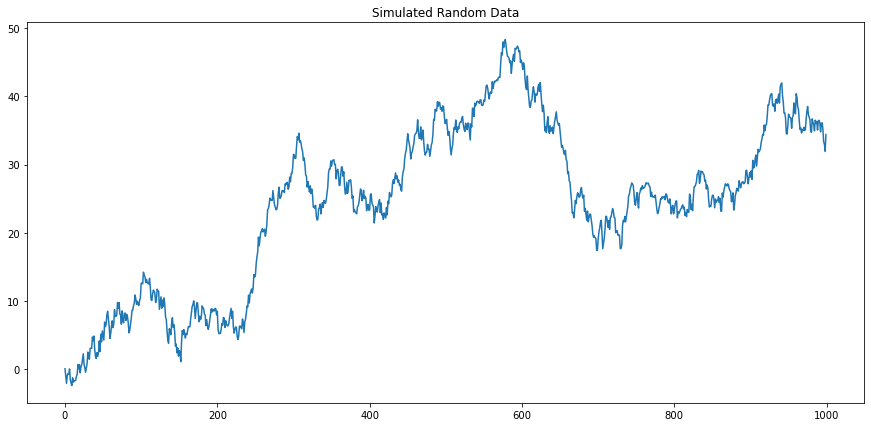

In [181]:
steps = np.random.standard_normal(1000)
steps[0] = 0
random_walk = np.cumsum(steps)
print(random_walk[:10])
# now plot the random walk
plt.plot(random_walk)
plt.title("Simulated Random Data")

In [182]:
random_walk_acf_coef = acf(random_walk,nlags=1000)
random_walk_acf_coef[:10]

C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.99423786, 0.98889654, 0.98329306, 0.97759894,
       0.97191683, 0.96608935, 0.96046551, 0.95469645, 0.94867085])

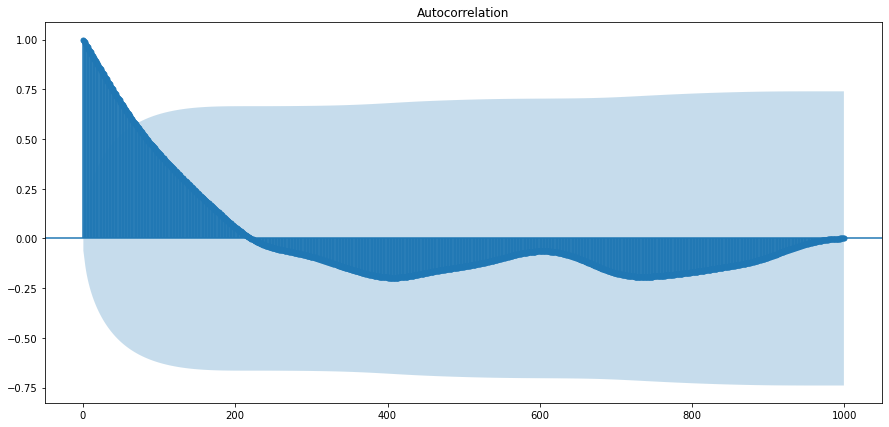

In [183]:
#plot acf
plot_acf(random_walk_acf_coef,lags=999)
plt.show()

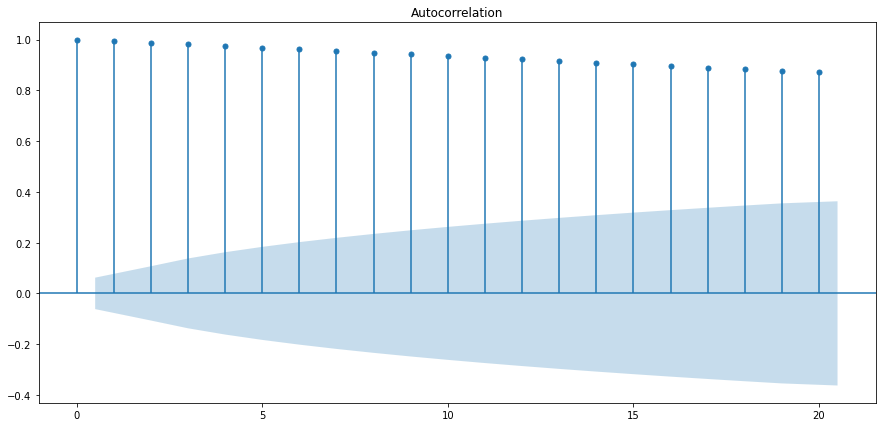

In [184]:
#plot acf
plot_acf(random_walk_acf_coef,lags=20,alpha=0.05)
plt.show()

#### It is significant but is non stationary

In [185]:
# now difference
random_walk_diff = np.diff(random_walk, n=1)
random_walk_diff[:10]

array([-1.01906479, -1.12630133,  1.19697544,  0.25874073, -0.1122339 ,
        0.78375979, -1.61678731, -0.4950756 , -0.32063192,  1.14212024])

Text(0.5, 1.0, 'Noise')

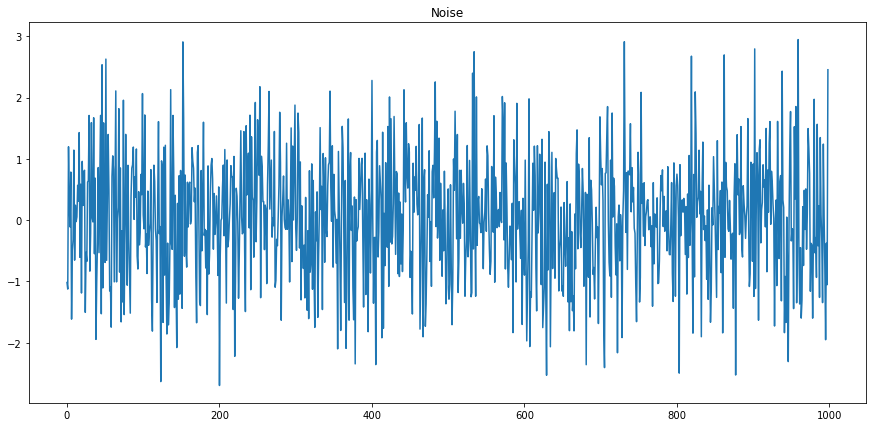

In [186]:
#now plot the diff
plt.plot(random_walk_diff)
plt.title("Noise")

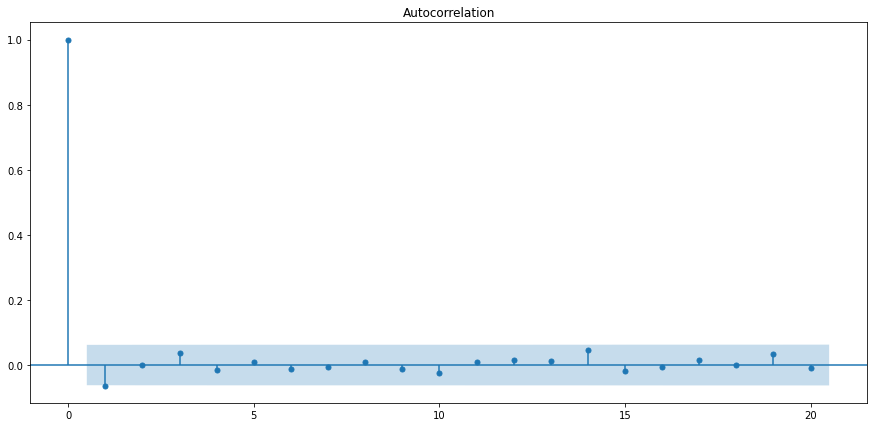

In [187]:
#now plot acf
plot_acf(random_walk_diff,lags=20);

##### now  it is stationary and is not significant